In [1]:
from jupyterthemes import jtplot
jtplot.style(theme="onedork")

import torch
import torch.utils.data as Data
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 超参数
lr = 0.01
batch_size = 32
num_epochs = 12

In [3]:
# 生成数据
x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
y = x.pow(2) + 0.1 * torch.normal(torch.zeros(x.size()))

In [4]:
# dataset
torch_dataset = Data.TensorDataset(x, y)

In [5]:
# 生成批量生成器
loader = Data.DataLoader(dataset=torch_dataset, batch_size=batch_size, shuffle=True)

In [6]:
# 构建网络模型
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1, 20)
        self.predict = torch.nn.Linear(20, 1)

    def forward(self, x):
        x = self.hidden(x)
        x = F.relu(x)
        x = self.predict(x)
        return x

In [7]:
# 模型
net_SGD = Net()
net_Momentum = Net()
net_RMSProp = Net()
net_Adam = Net()
nets = [net_SGD, net_Momentum, net_RMSProp, net_Adam]

# 使用多种优化器
optim_SGD = torch.optim.SGD(net_SGD.parameters(), lr=lr)
optim_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr=lr, momentum=0.9)
optim_RMSProp = torch.optim.RMSprop(net_RMSProp.parameters(), lr=lr, alpha=0.9)
optim_Adam = torch.optim.Adam(net_Adam.parameters(), lr=lr, betas=(0.9, 0.99))
optimizers = [optim_SGD, optim_Momentum, optim_RMSProp, optim_Adam]

In [8]:
# 损失函数
loss_func = torch.nn.MSELoss()
loss_his = [[], [], [], []]

In [9]:
# 训练模型
for epoch in range(num_epochs):
    for step, (batch_x, batch_y) in enumerate(loader):
        for net, opt, l_his in zip(nets, optimizers, loss_his):
            # 前向传播
            output = net(batch_x)
            # 计算损失函数
            loss = loss_func(output, batch_y)
            # 梯度置为0
            opt.zero_grad()
            # 反向传播
            loss.backward()
            # 优化
            opt.step()
            l_his.append(loss.data.numpy())

labels = ["SGD", "Momentum", "RMSprop", "Adam"]

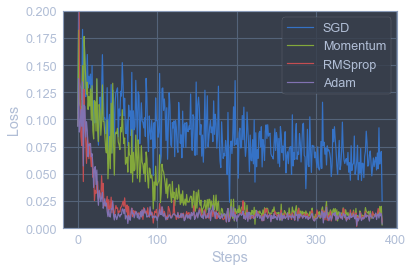

In [10]:
# 可视化
for i, l_his in enumerate(loss_his):
    plt.plot(l_his, label=labels[i])
plt.legend(loc="best")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.ylim(0, 0.2)
plt.show()
